## REGRESSION ANALYSIS

## Overview

Regression analysis examines the relationship between one dependent variable and one or more independent variables. The primary purpose of regression analysis is to determine how a change in the independent variable affects the dependent variable. <br>

The aim of regression analysis is to: 
- model the connection between variables
- predict the value of the dependent variable based on the values of the independent variables and 
- understand the strength and nature of the relationship between the variables

#### Regression analysis include 
- Simple Linear Regression which involves two variables. It assumes a linear (straight line) relationship between them
- Mutliple Linear Regression which involves two or more indepedent variable and one dependent variable.  It assumes a linear (straight line) relationship between them. It focuses on predicting the dependent variablebased on a combination of two or more independent variables. 
- Polynomial Regression which fits a polynomial equation to the data, allowing for curves instead of straight lines in the relationship between variables
- Logistic Regression which predicts the probability of a binary outcome (such as yes/no, 1/0, true/false) based on one or more predictor variables.



The goal of this task is to create **linear (simple and multiple) regression models** for a given dataset( House Sales in King County, USA) which would predict the prices of houses in King County, USA.

## King County, USA Housing Dataset

### Description

This dataset consists of homes in King County sold between May 2014 and May 2015. It has 20 features (columns), the price column and 21613 observations (rows).

The dataset variables include:

1. `id`- Unique ID for each home sold
2. `date` - Date of the home sale
3.`price` - Price of each home sold
4. `bedrooms` - Number of bedrooms
5. `bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. `sqft_living` - Square footage of the apartments interior living space
7. `sqft_lot` - Square footage of the land space
8. `floors` - Number of floors
9. `waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not
10. `view` - An index from 0 to 4 of how good the view of the property wasbv
11. `condition` - An index from 1 to 5 on the condition of the apartment,
12. `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. `sqft_above` - The square footage of the interior housing space that is above ground level
14. `sqft_basement` - The square footage of the interior housing space that is below ground level
15.`yr_built` - The year the house was initially built
16. `yr_renovated` - The year the house was last renovated
17. `zipcode` - What zipcode area the house is in
18. `lat` - Lattitude of the house location
19. `lat` - Longitude of the house loaction
20. `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
21. `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


Please note: for the uploaded dataset, the id and date columns have previously been removed. 

### Business Problem 

The aim of this regression analysis is to predict house prices using the relevat features present in the dataset. This analysis would provide insights to real estate developers, house buyers,house sellers etc and enable them to conside the features that could potentially influence the price of a house.

In this analysis, we would consider:
- What house feature(s) contributes most to the price of a house?
- To what extend does each of these feature impact the house price?
- How should the results be interpreted in the context of building a house to optimize sale price?

### Data Pre-processing

First, we import the required libraries like pandas, numpy, seaborn, matplotlib. <br>
Next we import the csv file and read it into the dataframe.<br>
Using the info function, we observe how the data is, ie, the datatypes. This function also shows the features with null (missing) values <br>
We also use the shape function to know the no of rows and columns we have in the dataset.<br>
The describe function helps to identify potential outliers, understand the spread of the data, and get a general overview of the dataset's numerical features.



In [128]:
#import relevant libraries

import numpy as np # Numeric calculation
import pandas as pd #Analysing data and reading CSV files
import matplotlib.pyplot as plt #For visualising data
import sklearn

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import seaborn as sns #For visualising data

In [129]:
#read the csv file into dataframe
df_p = pd.read_csv('./houseprice_data.csv')

In [130]:
#view dataframe
df_p.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
#view datashape (no of rows and columns)
df_p.shape

(21613, 19)

In [132]:
#view datatypes of each feature
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

With the info above, there are no missing values and null values in the dataset.

In [133]:
#confirm the presence/absence of null values
df_p.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [134]:
#view the mean, count, min, max, percentile, standard deviation of given data
df_p.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There's a potential presence of outliers in the bedrooms column as the maximum count of bedrooms is '33' while a majority of the values are close to the mean (3) of the number of bedrooms with a standard deviation of 0.9. <br>

There also appears to be potential outliers in sqft_living and bathrooms columns.

In [135]:
#finding value counts of no of bedrooms 
df_p.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [136]:
#finding value counts of no of bathrooms
df_p.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [137]:
#finding value counts of sqft_living
df_p.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

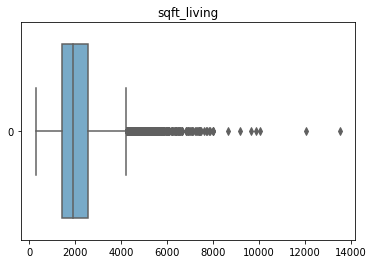

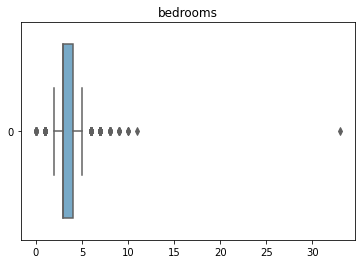

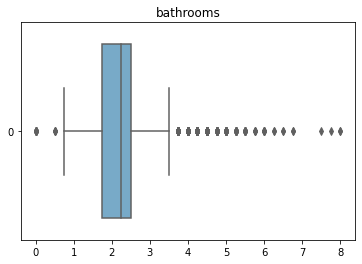

In [138]:
# using boxplots to visually explore outliers 
for x in ['sqft_living','bedrooms','bathrooms']:
    plt.figure()
    sns.boxplot(data=df_p[x], orient='h', palette='Blues').set_title(x)
# ax1 = sns.boxplot(data=df['bedrooms'], orient='h')

In [139]:
#indeed the presence of an outlier has been confirmed for the bedrooms, bathrooms and sqft_living columns
#removing outlier with '33' bedrooms
#removing houses with more than 7 bathrooms
#removing houses with more than 11,500 sqft space
#These outliers are removed in an attempt to improve data quality

df_p=df_p[df_p['bedrooms']!=33]
df_p=df_p[df_p['bathrooms']<=7]
df_p=df_p[df_p['sqft_living']<=11500]


In [140]:
#check if the outliers has been successfully removed
df_p.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      270
1      199
7       37
0       13
8       13
9        5
10       3
11       1
Name: bedrooms, dtype: int64

In [141]:
df_p.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
6.25       2
6.50       2
Name: bathrooms, dtype: int64

In [142]:
df_p.sqft_living.value_counts()

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
5844      1
2507      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1035, dtype: int64

Outliers have been removed successfully.

## Using Simple Linear Regression for House Price Prediction

In [143]:
df_p.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Deciding features to use for the model<br>

Use heatmap to check which variables are most correlated with price.

<function matplotlib.pyplot.show(close=None, block=None)>

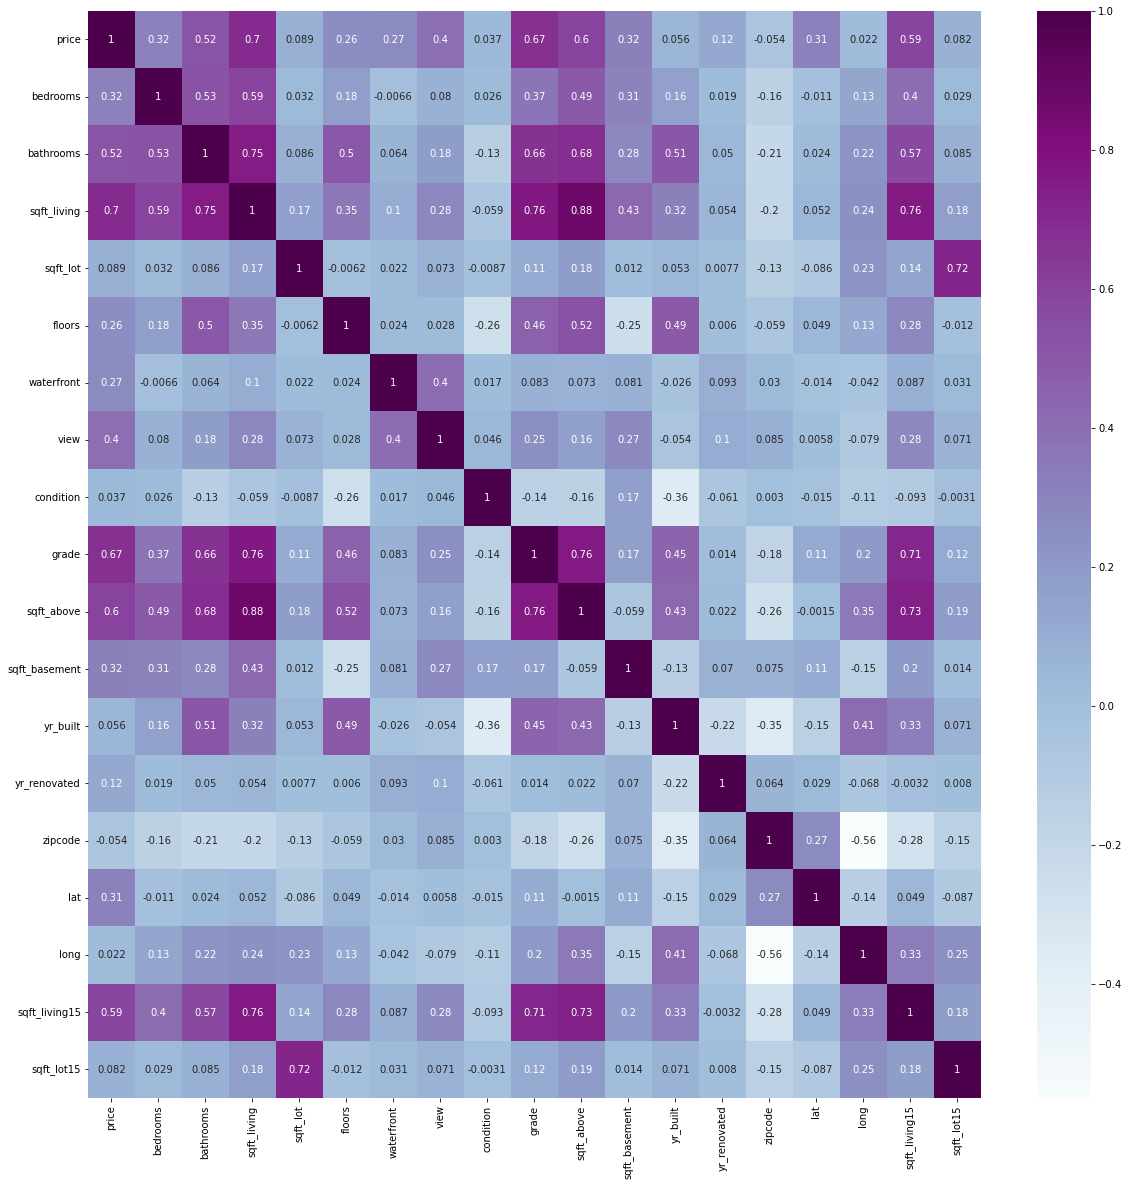

In [144]:
#Using heatmap to visualise the correlation between pairs of columns in the dataset
fig0 = plt.figure(figsize = (20,20))
sns.heatmap(data = df_p.corr(), annot = True, cmap = 'BuPu')
plt.show
#fig0.savefig('Reg0.png')

### Using single features to predict house price

From the figure above, the 'sqft_living' column has the highest correleation of 0.7 with price, our target variable, so we start with that as our independent variable. 

In [145]:
#Select variables for creating our model X(sqft_living) & y(price)
X = df_p.iloc[:,[3]].values # Independent
y = df_p.iloc[:,0].values # target

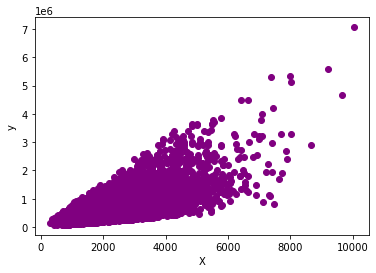

In [146]:
# visualise X & y
fig1, ax1 = plt.subplots()
ax1.scatter(X, y, color='purple')

ax1.set_xlabel('X')
ax1.set_ylabel('y')
fig1.savefig('Reg1.png')

#### Fit the model and interpret

In [147]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
       random_state=0 )

In [148]:
# fit the linear least-squares regression line on training set:
regline = LinearRegression()
regline.fit(X_train, y_train)


# The coefficients
print('Coefficients: ', regline.coef_)

# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.9f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Coefficients:  [277.70983942]
Intercept:  -37428.057730835746
Mean squared error: 65325477290.714683533
Coefficient of determination: 0.50


- Coefficients: represents the estimated impact or weight of the predictor variable(s) on the target variable
- Intercept: the point where the regression line crosses the y-axis. it represents the estimated house price when all predictor variables are zero
- Mean Squared Error (MSE): quantifies the average squared difference between the actual target values and the predicted values by the model
- Coefficient of Determination (R-squared): measures the goodness of fit of the regression model.

#### Interpretation:

- A coefficient of ~ 278 suggests that for every unit increase in sqft_living, the predicted house price is expected to increase by ~278 units (currency in this case)
- An intercept of -37428 suggests that if the predictor variable (sqft_living) was zero, then the house price will be $37,428. Since a house with zero sqaure foot living is a house that does not exist, it would be unrealistic to consider this measure in our analysis.
- A MSE of 65325477290.714683533 means that the squared difference between the model's predicted house prices and the actual house prices is approximately 65,325,477,290.71. This shows great difference between the predicted house price and actual price. A lower MSE generally indicates better model performance.
- An R-squared value of 0.50 means that about half (50%) of the differences in house prices can be explained by the square footage feature we considered. An R-squared of 0.50 suggests moderate predictive power but leaves a significant portion of the variability unexplained.


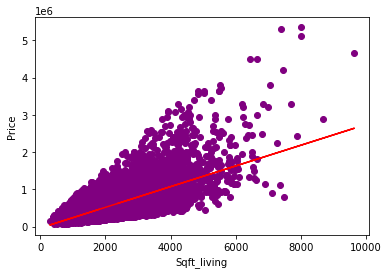

In [149]:
#Visualise training set results

fig2, ax2 = plt.subplots()

ax2.scatter(X_train, y_train, color='purple')
ax2.plot(X_train, regline.predict(X_train), color='red')

ax2.set_xlabel('Sqft_living')
ax2.set_ylabel('Price')

fig2.savefig('Reg1Train.png')

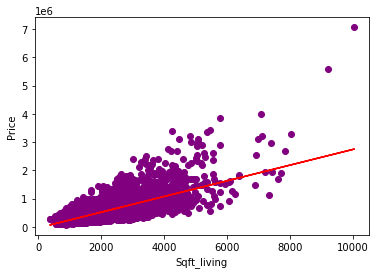

In [150]:
#Visualise testing set results

fig3, ax3 = plt.subplots()

ax3.scatter(X_test, y_test, color='purple')
ax3.plot(X_test, regline.predict(X_test), color='red')

ax3.set_xlabel('Sqft_living')
ax3.set_ylabel('Price')

fig3.savefig('Reg1Test.png')

## Multiple Regression

In [165]:
#View the correletion between pairs of columns in the dataset
df_p.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315367,0.521951,0.699802,0.089080,0.258071,0.270930,0.396119,0.036785,0.670739,0.602431,0.320282,0.055771,0.124485,-0.053764,0.310980,0.022436,0.589097,0.081503
bedrooms,0.315367,1.000000,0.527279,0.591733,0.031555,0.180276,-0.006557,0.080211,0.025781,0.365831,0.489308,0.308322,0.159177,0.019151,-0.157592,-0.010905,0.134122,0.402232,0.029065
bathrooms,0.521951,0.527279,1.000000,0.752763,0.085599,0.501079,0.064188,0.184351,-0.125271,0.664934,0.682542,0.280088,0.508456,0.049551,-0.205060,0.024017,0.224152,0.568552,0.084844
sqft_living,0.699802,0.591733,0.752763,1.000000,0.170037,0.353917,0.104807,0.280734,-0.058970,0.763739,0.875340,0.430643,0.320706,0.053669,-0.200861,0.052053,0.241787,0.758056,0.180325
sqft_lot,0.089080,0.031555,0.085599,0.170037,1.000000,-0.006165,0.021658,0.073147,-0.008747,0.112532,0.181441,0.012372,0.052850,0.007659,-0.129557,-0.086045,0.229281,0.143420,0.717873
floors,0.258071,0.180276,0.501079,0.353917,-0.006165,1.000000,0.023729,0.028335,-0.263740,0.457853,0.524467,-0.248292,0.489503,0.005972,-0.059124,0.049496,0.125329,0.279287,-0.012292
waterfront,0.270930,-0.006557,0.064188,0.104807,0.021658,0.023729,1.000000,0.402483,0.016662,0.082929,0.072579,0.080904,-0.026166,0.092949,0.030291,-0.014263,-0.041918,0.086582,0.030776
view,0.396119,0.080211,0.184351,0.280734,0.073147,0.028335,0.402483,1.000000,0.046224,0.249347,0.163387,0.274614,-0.053627,0.103417,0.085174,0.005806,-0.078737,0.278802,0.070828
condition,0.036785,0.025781,-0.125271,-0.058970,-0.008747,-0.263740,0.016662,0.046224,1.000000,-0.144791,-0.158747,0.174572,-0.361285,-0.060854,0.002956,-0.015026,-0.106380,-0.092734,-0.003130
grade,0.670739,0.365831,0.664934,0.763739,0.112532,0.457853,0.082929,0.249347,-0.144791,1.000000,0.755931,0.165757,0.447679,0.013512,-0.184929,0.113920,0.198535,0.712652,0.118057


In [154]:
df_p.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using two features

In [166]:
#Using two random selection of features which have an average correlation with price: Bedroom = 31%, Bathroom = 53%
X = df_p.iloc[:, [1,2]].values
y = df_p.iloc[:, 0].values

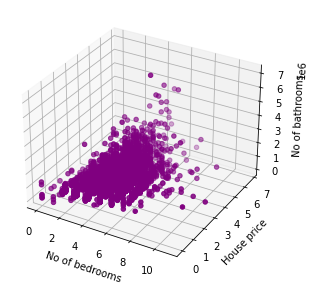

In [167]:
# plot both independent variables on one graph (3D plot for multiple regression)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection = '3d')

ax4.scatter(X[:, 0], X[:,1], y, color='purple')

ax4.set_xlabel('No of bedrooms')
ax4.set_ylabel('House price')
ax4.set_zlabel('No of bathrooms')

fig4.tight_layout()
fig4.savefig('3Dplt.png')

In [168]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3,
        random_state=0)

In [169]:
# fit the linear least-squares regression line to the training data:
regiine = LinearRegression()
regline.fit(X_train, y_train)

# The coefficients
print('Coefficients: ', regline.coef_)

# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.8f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Coefficients:  [ 20614.5077389  233735.22793497]
Intercept:  -24046.980006831698
Mean squared error: 92929226445.50639343
Coefficient of determination: 0.28


The Coefficient of determination of the linear regression is 0.28. This shows a weak linear elationship between house price, bedrooms and bathrooms.

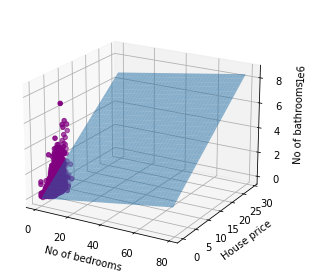

In [170]:
# plot both independent variables on one graph (3D plot for multiple regression)
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection = '3d')

ax5.scatter(X[:, 0], X[:,1], y, color='purple')

#plot the plane:
X1, X2 = np.meshgrid(range(80), range (30))
Z = regline.coef_[0]*X1 + regline.coef_[1]*X2 + regline.intercept_
ax5.plot_surface(X1, X2, Z, alpha=0.5)

#redirect the position of the plane
ax1.azim = 50
ax5.dist = 10
ax5.elev = 20 

ax5.set_xlabel('No of bedrooms')
ax5.set_ylabel('House price')
ax5.set_zlabel('No of bathrooms')

fig5.tight_layout()
fig5.savefig('3Dplt2.png')

### Using all features

In [171]:
#drop the price column to use the remaining columns as the independent variabes
X = df_p.drop("price", axis=1)
y = df_p["price"]

In [172]:
# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
       random_state=0 )

In [173]:
# fit the linear least-squares regression line on training set:
regline = LinearRegression()
regline.fit(X_train, y_train)

LinearRegression()

In [174]:
cdf = pd.DataFrame(regline.coef_, X.columns, columns=['Coefficients'])
print(cdf)

                Coefficients
bedrooms       -36124.570129
bathrooms       39261.452000
sqft_living       102.902099
sqft_lot            0.156087
floors          12074.188014
waterfront     586692.221678
view            50342.474356
condition       27579.162164
grade           99615.197441
sqft_above         62.392819
sqft_basement      40.509280
yr_built        -2604.224248
yr_renovated       14.044304
zipcode          -534.407634
lat            604166.587539
long          -209075.077042
sqft_living15      33.204593
sqft_lot15         -0.360597


### Interpretation

**Negative Impact:**

Features like 'bedrooms', 'yr_built', 'zipcode', 'long', and 'sqft_lot15' have negative coefficients.
For example, an increase in the number of bedrooms is associated with a decrease in house prices by approximately 36,124.57 according to this model. <br>
Similarly, an increase in the year a house was built ('yr_built') might lead to a slight decrease of around $2,604.22 in the house price, according to this model. This turns out to be a surprising factor (especially for the bedrooms feature) for this model as one would assume that an increase in number of bedrooms would lead to an increase in price, not a decrease. <br>


**Positive Impact:**

Variables like 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', and 'sqft_living15' have positive coefficients.
For example, an increase in the number of bathrooms ('bathrooms') is associated with an increase in house prices by approximately $39,261.45. Similarly, features like 'waterfront', 'view', and 'grade' have significant positive impacts on house prices according to this model.


**Minor Impact:**

Some features, like 'sqft_lot', 'sqft_lot15', and 'yr_renovated', have coefficients close to zero. This indicates that changes in these features have minimal impact on house prices according to this model.

In [175]:
# The intercept
print('Intercept: ', regline.intercept_)

# The mean squared error
print('Mean squared error: %.5f'% mean_squared_error(y_test, regline.predict(X_test)))

# The R^2 value:
print('Coefficient of determination: %.2f'% r2_score(y_test, regline.predict(X_test)))

Intercept:  2545777.8819978214
Mean squared error: 39347130287.71059
Coefficient of determination: 0.70


The Coefficient of determination of the linear regression is 0.70, which means that about 70% of the data fit the regression model. An Coefficient of determination value of 0.70 suggests that the model explains around 70% of the variability in house prices using the included predictors. 

## Conclusion

What house feature(s) contributes most to the price of a house? Latitude (lat), Waterfront, Grade show the highest contributions to house prices followed by View, Sqft_living, Bathrooms, Floors, Bedrooms which show moderate positive contritbutions to house price. 

How should the results be interpreted in the context of building a house to optimize sale price? In terms of building a house to optimise sale price, a real estate developer should consider the size of the house as a single factor and collectively consider the geographic location of the house, the number of bathrooms, the construction quality, the house view etc.<br>

As a developer in King County aiming to optimize sale prices, prioritize large-scale construction, value the significance of quality building standards, and bear in mind the crucial impact of location. 